## Task 2 - Car Price Prediction with Machine Learning
### By Saad Bin Farooq

### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data and EDA (Explolatory Data Analysis)

In [2]:
data = pd.read_csv('CarPrice.csv', encoding='latin-1')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<AxesSubplot: xlabel='fueltype'>

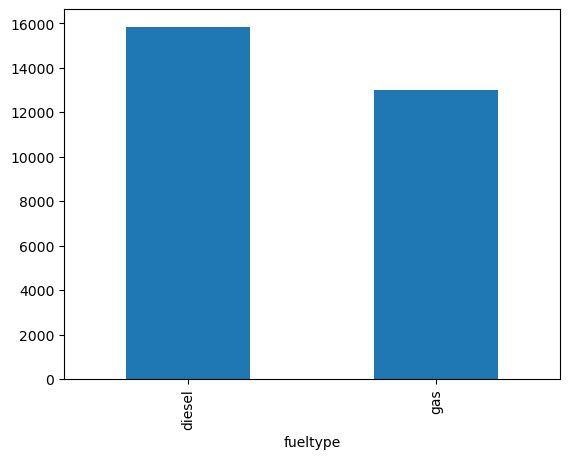

In [3]:
data = data.drop(['car_ID', 'symboling'], axis = 1)
data.groupby(['fueltype'])['price'].mean().plot(kind = 'bar')

<AxesSubplot: >

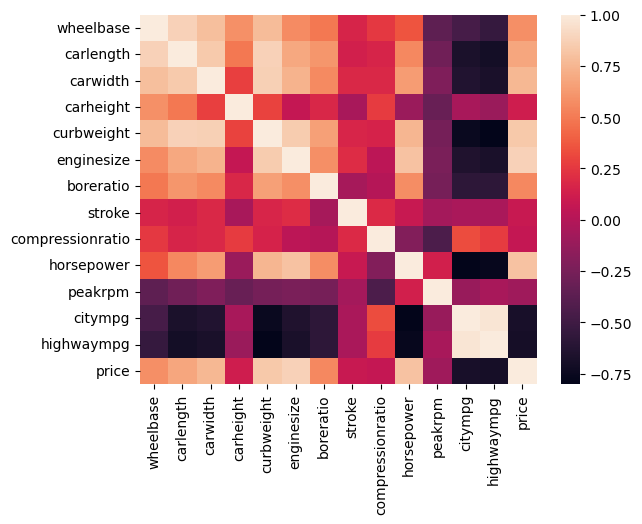

In [4]:
correletions = data.corr(numeric_only = True)
sns.heatmap(correletions)

In [5]:
#Removing features with correlation greater then 0.9
data = data.drop(['highwaympg'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

### Handling Categorical Data

In [6]:
categorical_cols = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
for col_name in categorical_cols:
    data[col_name] = data[col_name].astype('category')
    data[col_name] = data[col_name].cat.codes

<AxesSubplot: >

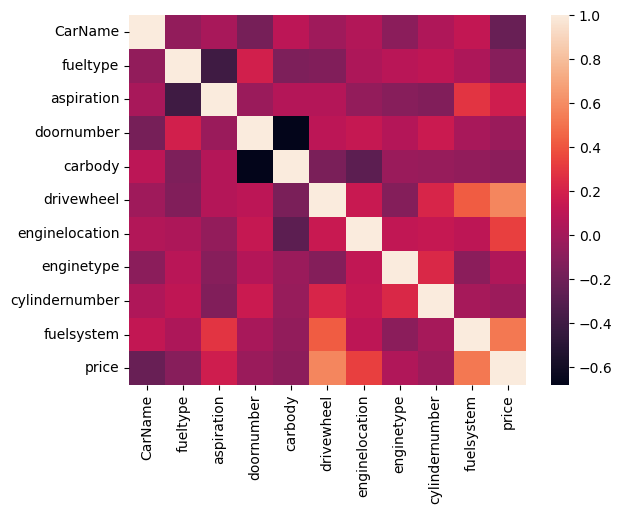

In [7]:
categorical = categorical_cols + ['price']
sns.heatmap(data[categorical].corr())

In [8]:
#Removing categorical features which contribute less to the price
data = data.drop(['fueltype', 'enginelocation', 'enginetype', 'cylindernumber'], axis = 1)
data.head()

,CarName,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,2,0,1,0,2,88.6,168.8,64.1,48.8,2548,130,5,3.47,2.68,9.0,111,5000,21,13495.0
1,3,0,1,0,2,88.6,168.8,64.1,48.8,2548,130,5,3.47,2.68,9.0,111,5000,21,16500.0
2,1,0,1,2,2,94.5,171.2,65.5,52.4,2823,152,5,2.68,3.47,9.0,154,5000,19,16500.0
3,4,0,0,3,1,99.8,176.6,66.2,54.3,2337,109,5,3.19,3.40,10.0,102,5500,24,13950.0
4,5,0,0,3,0,99.4,176.6,66.4,54.3,2824,136,5,3.19,3.40,8.0,115,5500,18,17450.0


### Model Selection and Evaluation

In [9]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [10]:
X = data.drop('price', axis = 1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

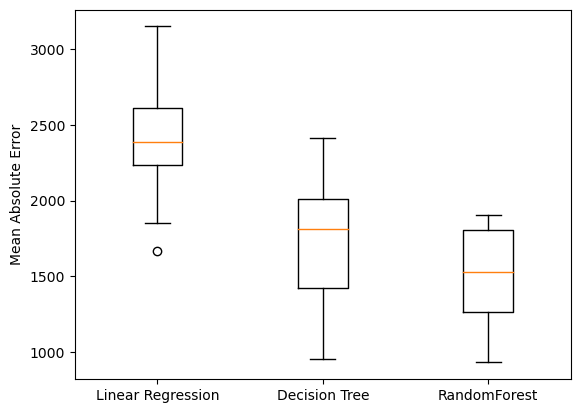

In [11]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
names = ['Linear Regression', 'Decision Tree', 'RandomForest']
results = []

for model in models:
    
    result = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10)
    results.append(-1 * result)

plt.boxplot(results, labels = names)
plt.ylabel('Mean Absolute Error')
plt.show()

In [12]:
model = RandomForestRegressor(n_estimators = 400)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
print('MAE: ', mean_absolute_error(y_pred, y_test))
print('MSE: ', mean_squared_error(y_pred, y_test))
print('R2 Score: ', r2_score(y_pred, y_test))

MAE:  1268.5908658536584
MSE:  3361168.103550402
R2 Score:  0.9518317054401779
